In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from imblearn import under_sampling, over_sampling
from sklearn.model_selection import train_test_split




In [26]:
!pip install imblearn

     |████████████████████████████████| 199 kB 431 kB/s eta 0:00:01
     |████████████████████████████████| 8.7 MB 141 kB/s eta 0:00:01     |██                              | 552 kB 682 kB/s eta 0:00:12
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [2]:
df_ol_shop = pd.read_csv('./Data/online_shoppers_intention.csv')

df_ol_shop.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6562,8,125.733333,0,0.000,7,81.666667,0.033333,0.024167,0.000000,0.0,Sep,2,2,1,1,Returning_Visitor,False,False
10467,0,0.000000,0,0.000,1,0.000000,0.200000,0.200000,0.000000,0.0,Dec,3,2,2,10,Other,False,False
11598,16,164.925000,5,66.875,64,1899.598899,0.010965,0.029950,83.786512,0.0,Nov,3,2,1,3,Returning_Visitor,True,False
6463,0,0.000000,0,0.000,7,431.533333,0.000000,0.007143,0.000000,0.0,Oct,2,2,1,2,Returning_Visitor,False,False
4630,8,50.750000,1,26.750,22,553.583333,0.000000,0.017857,5.798000,0.0,May,2,2,1,5,New_Visitor,False,False


### 1. Data Cleansing

#### A. Missing Handle Value


In [3]:
df_ol_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Check missing value foreach column 

df_ol_shop.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

##### Tidak terdapat missing value, sehingga tidak perlu handdling missing value.

#### B. Handle duplicated data

In [5]:
# Check total duplicate

df_ol_shop.duplicated().sum()

125

In [54]:
# Copy for assigning df_ol_shop
df_ol_shop_2 = df_ol_shop.copy()

# Drop Duplicate
df_ol_shop_2 = df_ol_shop_2.drop_duplicates(ignore_index=True)

df_ol_shop_2

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12200,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12201,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12202,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12203,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [55]:
# Check after delete duplicate data 

df_ol_shop_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12205 entries, 0 to 12204
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

##### Menghapus data duplicates

#### C. Handle outliers

In [56]:
# pengelompokan kolom berdasarkan jenisnya

nums = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated','ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 'VisitorType', 'Weekend', 'Revenue']

In [57]:
df_ol_shop_2[nums].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000,12205.000000
mean,2.338878,81.646331,0.508726,34.825454,32.045637,1206.982457,0.020370,0.041466,5.949574,0.061942
std,3.330436,177.491845,1.275617,141.424807,44.593649,1919.601400,0.045255,0.046163,18.653671,0.199666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,193.000000,0.000000,0.014231,0.000000,0.000000
50%,1.000000,9.000000,0.000000,0.000000,18.000000,608.942857,0.002899,0.025000,0.000000,0.000000
75%,4.000000,94.700000,0.000000,0.000000,38.000000,1477.154762,0.016667,0.048529,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


##### Menggunakan Zscore

In [50]:
# z_scores = np.abs(stats.zscore(df_ol_shop_2[nums]))

# z_scores

In [51]:
# def getZScore(data):
#     # print(data)
#     # print(np.array(data))
#     max_zscore = np.array(data).max()
#     print(max_zscore)

#     return max_zscore

In [52]:
# df_ol_shop_2['z_scores'] = z_scores.apply(lambda x: getZScore(x), axis=1)

# df_ol_shop_2

In [53]:
# df_ol_shop_2_no_outlier = df_ol_shop_2[df_ol_shop_2['z_scores'] <= 3]
# df_ol_shop_2_no_outlier

In [59]:
# print('Data Sebelum handling outlier: ', len(df_ol_shop_2))
# print('Data Sesudah handling outlier: ', len(df_ol_shop_2_no_outlier))

In [58]:
print('Data Sebelum handling outlier: ', len(df_ol_shop_2))

filtered_entries = np.array([True] * len(df_ol_shop_2))
# print(filtered_entries)

for col in nums:
    zscore = abs(stats.zscore(df_ol_shop_2[col]))
    # print(zscore)
    filtered_entries = (zscore < 3) & filtered_entries
    # print(filtered_entries)

df_ol_shop_zscore = df_ol_shop_2[filtered_entries]
print('Data sesudah handling outlier: ', len(df_ol_shop_zscore))

Data Sebelum handling outlier:  12205
Data sesudah handling outlier:  10020


##### Menggunakan IQR

In [60]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    Q1 = df_ol_shop_2[col].quantile(0.25)
    Q3 = df_ol_shop_2[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_iqr = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_iqr)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5044


#### Menggunakan Flooring and Capping

In [61]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ol_shop_2)}')

filtered_entries = np.array([True] * len(df_ol_shop_2))
for col in nums:
    low_limit = df_ol_shop_2[col].quantile(0.10)
    high_limit = df_ol_shop_2[col].quantile(0.90)
    

    filtered_entries = ((df_ol_shop_2[col] >= low_limit) & (df_ol_shop_2[col] <= high_limit)) & filtered_entries
    
df_ol_shop_flor_cap = df_ol_shop_2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ol_shop_flor_cap)}')

Jumlah baris sebelum memfilter outlier: 12205
Jumlah baris setelah memfilter outlier: 5150


##### Handle Outlier dengan menggunakan Zscore menghasilkan perubahan jumlah data dari 12205 menjadi 10020

#### D. Feature transformation

##### Data sebaran sebelum dilakukan Feature transformation

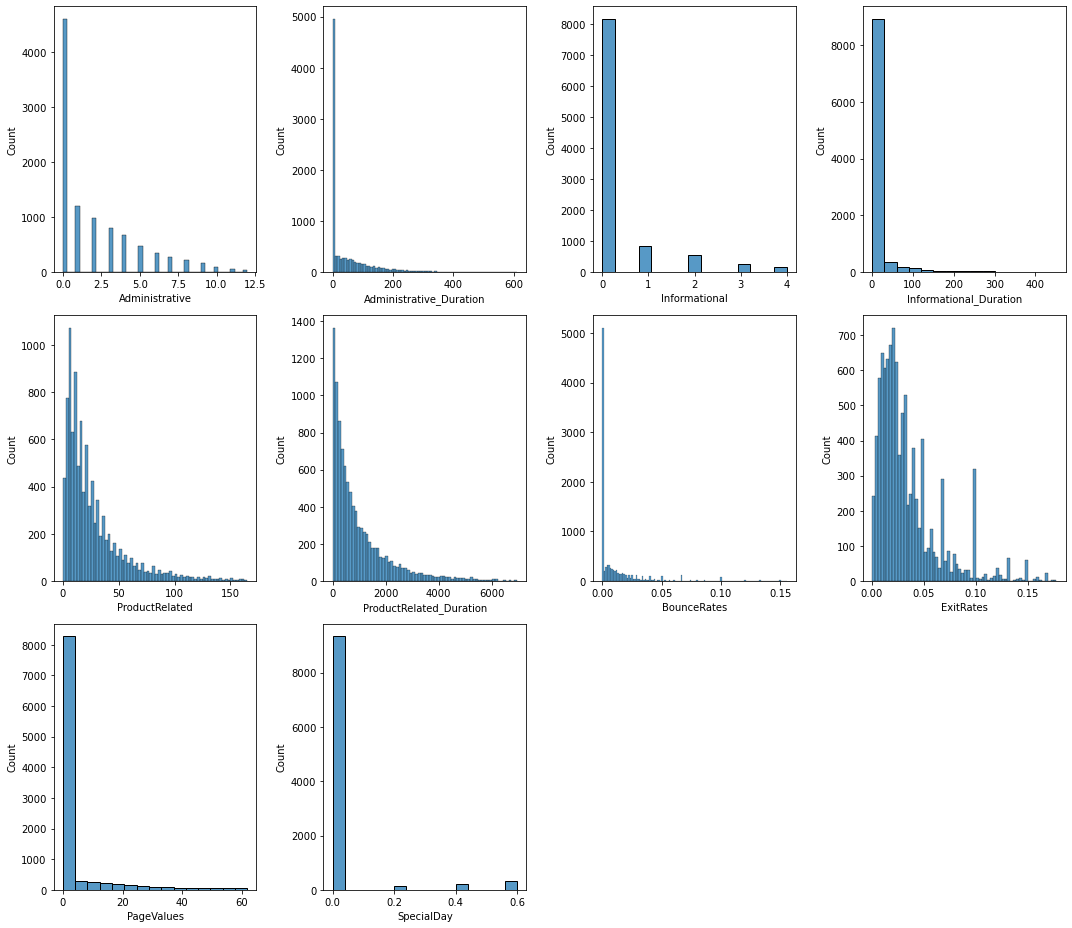

In [62]:
fig = plt.figure(figsize=(15, 13))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(3, 4, i+1) # kita set posisi plotnya di layout
    sns.histplot(data=df_ol_shop_zscore, x=nums[i]) # 
    plt.tight_layout()

#### Menggunakan Robust Scaler

In [64]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

In [105]:
df_ol_shop_robust_scaler = df_ol_shop_zscore.copy()

df_ol_shop_robust_scaler.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6517,3,444.70,0,0.0,59,3296.550000,0.006667,0.026500,0.000000,0.0,Jul,2,2,4,13,Returning_Visitor,False,False
12198,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
1289,2,17.00,0,0.0,20,1415.625000,0.012698,0.044762,32.578313,0.0,Mar,3,3,1,10,Returning_Visitor,False,False
9257,3,21.00,0,0.0,109,2587.530411,0.000000,0.010360,0.000000,0.0,Nov,2,2,1,3,Returning_Visitor,False,True
9692,5,83.00,0,0.0,69,2517.216667,0.000342,0.021766,0.000000,0.0,Nov,2,2,9,2,Returning_Visitor,False,False


In [106]:
nums_robust = []
for col in nums:
    col_name = 'robust_' + col
    nums_robust.append(col_name)
    df_ol_shop_robust_scaler[col_name] = scaler.fit_transform(df_ol_shop_robust_scaler[col].values.reshape(len(df_ol_shop_robust_scaler), 1))
    df_ol_shop_robust_scaler = df_ol_shop_robust_scaler.drop(columns=col)

df_ol_shop_robust_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,robust_Administrative,robust_Administrative_Duration,robust_Informational,robust_Informational_Duration,robust_ProductRelated,robust_ProductRelated_Duration,robust_BounceRates,robust_ExitRates,robust_PageValues,robust_SpecialDay
2963,May,3,3,4,2,New_Visitor,True,False,0.666667,1.313609,0.0,0.0,-0.481481,-0.347476,-0.024778,-0.357370,0.000000,0.0
2093,May,2,4,2,2,Returning_Visitor,False,False,1.000000,0.449704,0.0,0.0,0.407407,4.077000,-0.024778,-0.170359,0.000000,0.0
5794,Jul,3,2,1,2,Returning_Visitor,False,False,1.333333,0.891662,3.0,106.8,2.296296,3.228921,-0.012459,-0.445766,1.257696,0.0
12083,Nov,2,2,2,1,Returning_Visitor,False,False,-0.333333,-0.106509,0.0,0.0,-0.111111,-0.289005,-0.024778,-0.166773,0.000000,0.0
22,Feb,3,2,1,5,Returning_Visitor,False,False,-0.333333,-0.106509,0.0,0.0,-0.555556,-0.429762,-0.024778,0.277955,0.000000,0.0


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Robust Scaler

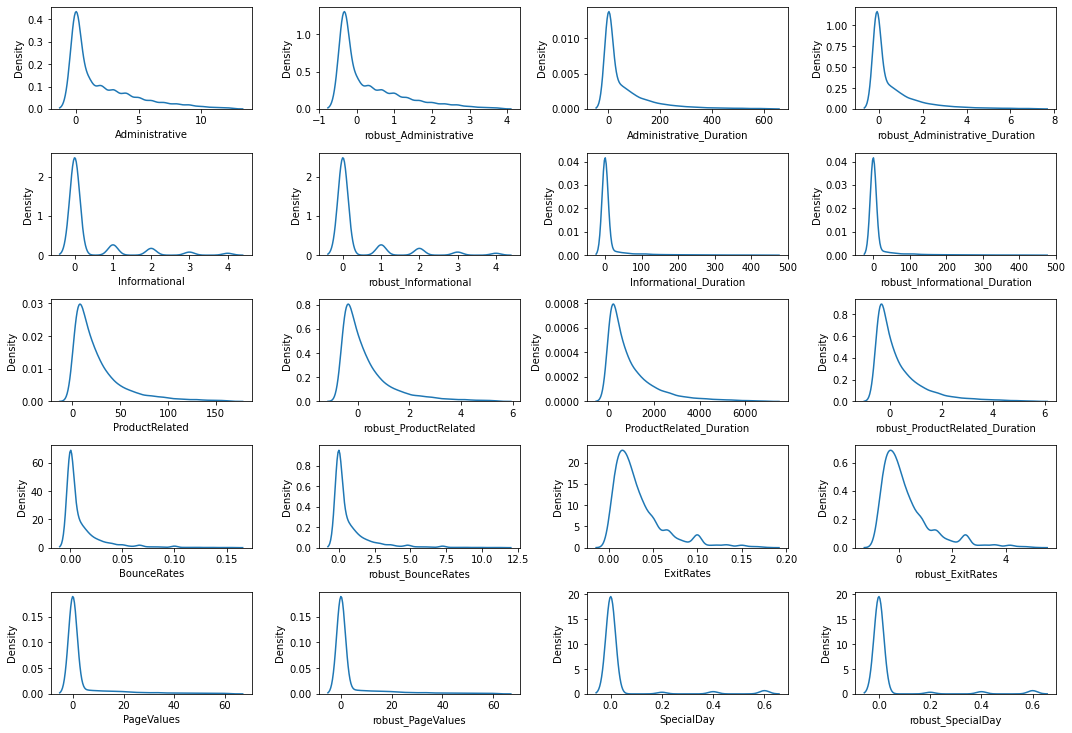

In [107]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_zscore, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_robust_scaler, x=nums_robust[i])

    plt.tight_layout()

##### Menggunakan Log Transformation

In [108]:
df_ol_shop_2_log_transformation = df_ol_shop_zscore.copy()

df_ol_shop_2_log_transformation.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4005,0,0.000000,0,0.0,4,64.000000,0.000000,0.050000,0.000000,0.4,May,2,5,3,1,Returning_Visitor,False,False
1464,0,0.000000,0,0.0,93,4261.842857,0.002930,0.021081,0.000000,0.0,Mar,3,3,8,1,Returning_Visitor,False,False
1961,3,221.500000,4,172.0,28,1365.216667,0.000000,0.012302,0.000000,0.0,Mar,2,2,3,2,Returning_Visitor,False,False
9010,6,169.791667,0,0.0,32,1547.625000,0.000000,0.013158,23.531057,0.0,Dec,2,2,1,1,Returning_Visitor,False,False
3676,3,203.000000,0,0.0,28,2394.000000,0.033333,0.057619,0.000000,0.0,May,2,2,7,1,Returning_Visitor,False,False


In [109]:
nums_log = []
for col in nums:
    log_name_colum = 'log_' + col
    nums_log.append(log_name_colum)
    # print(log_name_colum)
    df_ol_shop_2_log_transformation[log_name_colum] = np.log(df_ol_shop_2_log_transformation[col])
    df_ol_shop_2_log_transformation = df_ol_shop_2_log_transformation.drop(columns=col)

# print(nums_log)
df_ol_shop_2_log_transformation.sample(5)


/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/mps/opt/anaconda3/lib/python3.9/site-packages/pandas/core/array

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,log_Administrative,log_Administrative_Duration,log_Informational,log_Informational_Duration,log_ProductRelated,log_ProductRelated_Duration,log_BounceRates,log_ExitRates,log_PageValues,log_SpecialDay
1464,Mar,3,3,8,1,Returning_Visitor,False,False,-inf,-inf,-inf,-inf,4.532599,8.357457,-5.832615,-3.859391,-inf,-inf
4783,May,3,2,3,3,Returning_Visitor,False,False,-inf,-inf,-inf,-inf,0.693147,3.295837,-inf,-2.995732,-inf,-inf
6644,Aug,2,2,3,2,New_Visitor,False,False,0.693147,4.338597,-inf,-inf,3.637586,8.261712,-inf,-5.913503,-inf,-inf
5302,May,3,2,3,13,Returning_Visitor,False,False,-inf,-inf,-inf,-inf,1.609438,3.091042,-2.525729,-2.120264,-inf,-inf
10180,Nov,3,2,8,2,New_Visitor,True,False,1.386294,4.711031,0.693147,3.248435,2.772589,6.020872,-4.653960,-4.653960,-inf,-inf


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Log Transformation

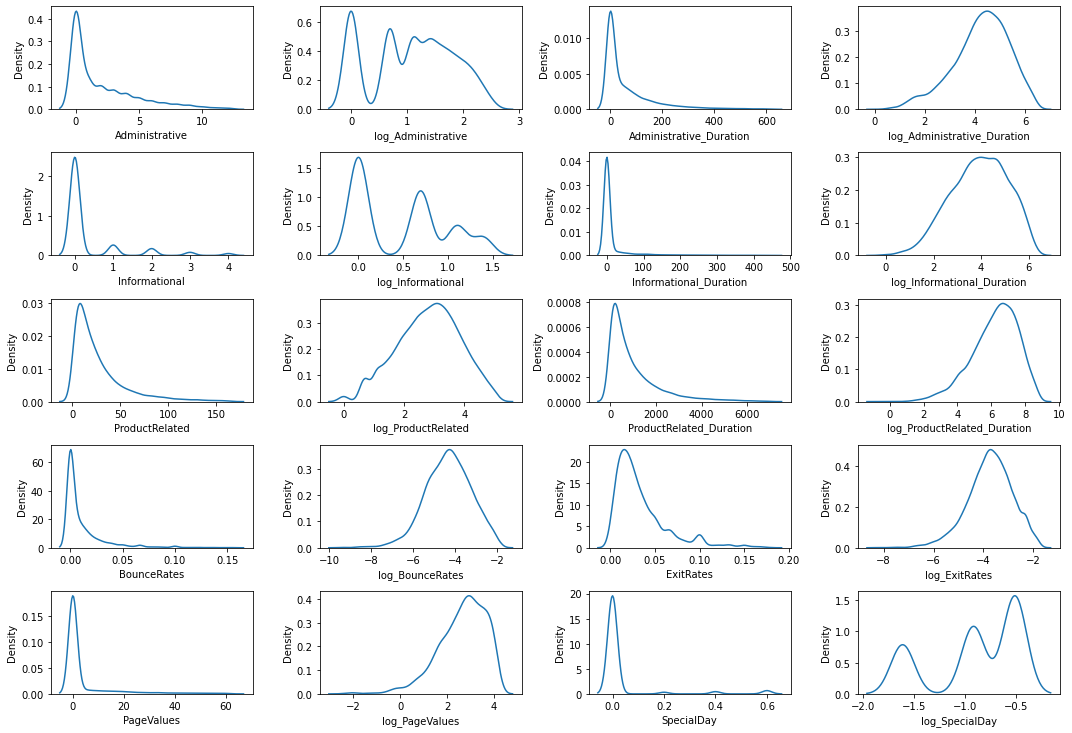

In [110]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_zscore, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_2_log_transformation, x=nums_log[i])

    plt.tight_layout()

#### Menggunakan Standardization

In [91]:
from sklearn.preprocessing import StandardScaler
standar_scaler = StandardScaler()

In [111]:
df_ol_shop_std_scaler = df_ol_shop_zscore.copy()

In [112]:
nums_std = []
for col in nums:
    col_name = 'std_' + col
    nums_std.append(col_name)
    df_ol_shop_std_scaler[col_name] = standar_scaler.fit_transform(df_ol_shop_std_scaler[col].values.reshape(len(df_ol_shop_std_scaler), 1))
    df_ol_shop_std_scaler = df_ol_shop_std_scaler.drop(columns=col)

df_ol_shop_std_scaler.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,std_Administrative,std_Administrative_Duration,std_Informational,std_Informational_Duration,std_ProductRelated,std_ProductRelated_Duration,std_BounceRates,std_ExitRates,std_PageValues,std_SpecialDay
2504,May,2,2,1,5,New_Visitor,True,False,1.456753,0.255398,-0.412281,-0.291260,0.180687,-0.089041,-0.266696,-0.759506,-0.375534,-0.254023
9235,Nov,2,10,1,3,Returning_Visitor,False,False,-0.754249,-0.612055,-0.412281,-0.291260,-0.937853,-0.815804,-0.539226,2.211580,-0.375534,-0.254023
499,Mar,2,2,6,2,New_Visitor,True,False,1.456753,-0.074140,-0.412281,-0.291260,-0.793525,-0.830048,-0.539226,-1.023070,-0.375534,-0.254023
5145,May,3,2,1,18,Returning_Visitor,False,False,0.351252,1.790278,-0.412281,-0.291260,-0.685279,-0.761251,-0.539226,-0.894394,-0.375534,-0.254023
5275,May,2,2,3,13,Returning_Visitor,False,False,-0.754249,-0.612055,0.797045,1.847565,-0.252296,-0.522566,0.823425,0.606616,-0.375534,4.749865


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Standardization

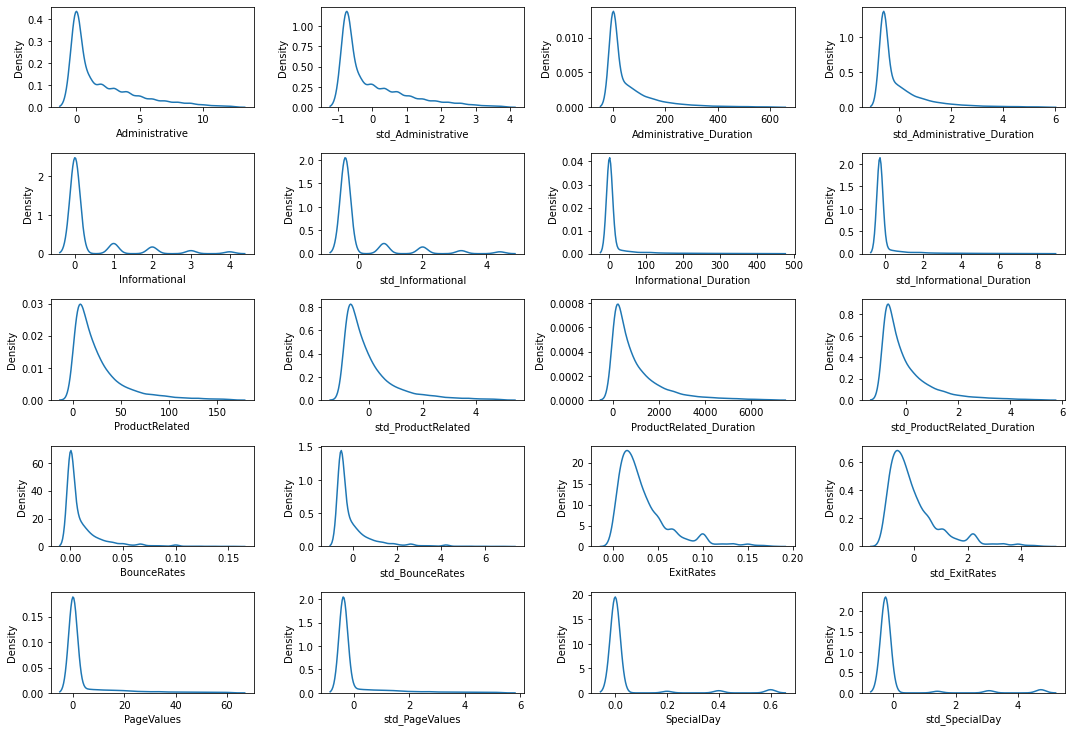

In [113]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_zscore, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_std_scaler, x=nums_std[i])

    plt.tight_layout()

#### Menggunakan Yeo - Jonshon

In [117]:
from sklearn.preprocessing import PowerTransformer
scaler_box_cox = PowerTransformer(method='yeo-johnson')

In [135]:
df_ol_shop_yeo_jo = df_ol_shop_zscore.copy()
df_ol_shop_yeo_jo.sample(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3063,0,0.0,0,0.0,10,466.500000,0.000000,0.022222,0.0,0.0,May,1,8,6,6,New_Visitor,False,False
12074,3,97.5,0,0.0,5,155.333333,0.000000,0.028571,0.0,0.0,Dec,3,2,1,2,New_Visitor,False,False
11135,2,93.0,2,221.0,41,716.791667,0.008889,0.041481,0.0,0.0,Nov,2,2,3,2,Returning_Visitor,False,False
5726,0,0.0,0,0.0,8,55.300000,0.000000,0.025000,0.0,0.0,Jul,1,1,3,3,Returning_Visitor,False,False
2578,0,0.0,0,0.0,27,420.000000,0.000000,0.007692,0.0,0.0,May,2,2,9,1,Returning_Visitor,True,False


In [136]:
nums_yj = []
for col in nums:
    col_name = 'yj_' + col
    nums_yj.append(col_name)
    df_ol_shop_yeo_jo[col_name] = scaler_box_cox.fit_transform(df_ol_shop_yeo_jo[col].values.reshape(len(df_ol_shop_yeo_jo), 1))
    df_ol_shop_yeo_jo = df_ol_shop_yeo_jo.drop(columns=col)

df_ol_shop_yeo_jo.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
11917,Nov,3,2,3,11,Returning_Visitor,True,False,-1.005528,-1.012006,-0.47612,-0.444929,-0.289279,0.786840,1.316880,0.840049,-0.491696,-0.270887
10788,Nov,2,2,2,1,Returning_Visitor,True,False,1.239848,0.848483,-0.47612,-0.444929,2.100116,2.424888,-0.283052,-0.876015,1.926620,-0.270887
4853,May,3,2,8,6,Returning_Visitor,False,False,0.888609,0.855831,-0.47612,-0.444929,0.512100,1.012539,0.189661,0.597719,-0.491696,-0.270887
9924,Dec,2,2,4,2,Returning_Visitor,False,False,-1.005528,-1.012006,-0.47612,-0.444929,0.400174,0.769934,-0.828285,-0.324660,2.083430,-0.270887
9239,Dec,2,5,1,1,Returning_Visitor,False,False,0.593599,0.260083,-0.47612,-0.444929,-0.289279,-0.155841,0.739308,-0.452453,-0.491696,-0.270887


#### Perbandingan Sebaran Data Sebelum dan Sesudah dilakukan Yeo-Jonshon

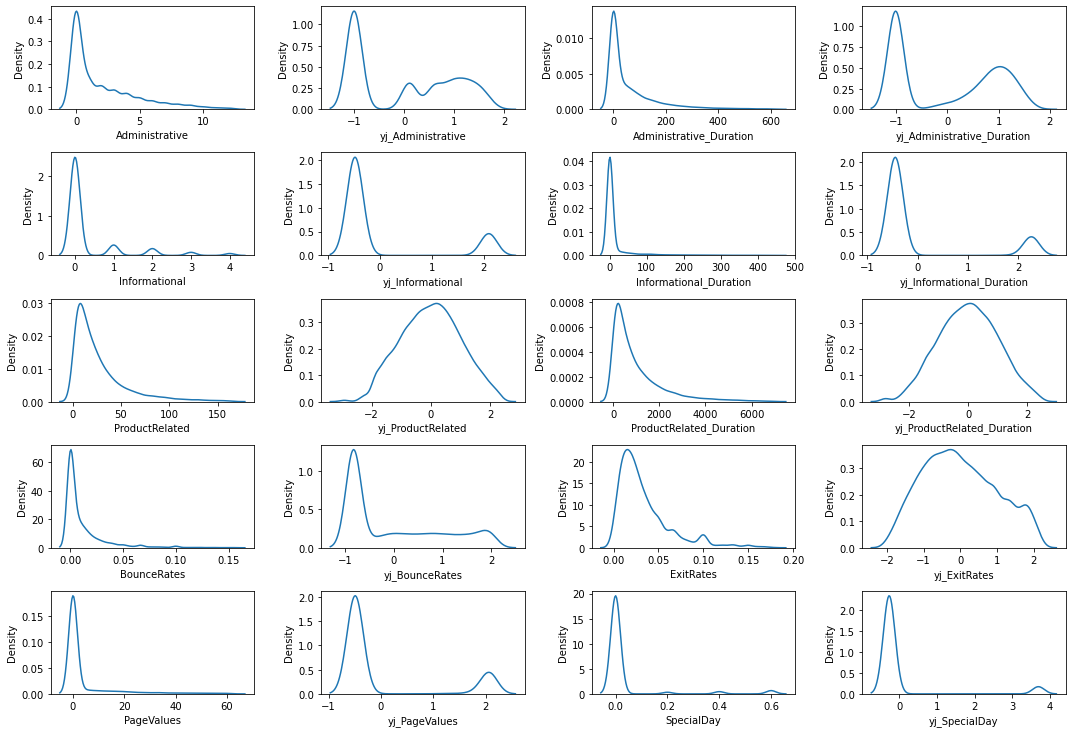

In [137]:
fig = plt.figure(figsize=(15, 20))
for i in range(0, len(nums)): # untuk setiap kolom numerik
    ax = fig.add_subplot(10, 4, (2*i)+1) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_zscore, x=nums[i]) # 
    ax = fig.add_subplot(10, 4, (2*i)+2) # kita set posisi plotnya di layout
    sns.kdeplot(data=df_ol_shop_yeo_jo, x=nums_yj[i])

    plt.tight_layout()

#### E. Feature encoding

In [138]:
# cats = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Month', 
#         'VisitorType', 'Weekend', 'Revenue']
df_ol_shop_feature_encoding = df_ol_shop_yeo_jo.copy()
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,yj_Informational,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay
210,Mar,1,2,6,6,Returning_Visitor,True,False,1.090494,0.836617,-0.476120,-0.444929,-0.865662,0.007739,0.162571,0.320039,-0.491696,-0.270887
189,Mar,1,1,1,1,Returning_Visitor,False,False,0.888609,0.802066,-0.476120,-0.444929,-0.637041,-0.446463,-0.828285,-0.374999,-0.491696,-0.270887
7668,Nov,2,2,1,2,Returning_Visitor,False,False,-1.005528,-1.012006,2.135251,2.269446,0.735990,0.458442,0.542802,0.518042,-0.491696,-0.270887
457,Mar,3,2,4,14,Returning_Visitor,True,False,-1.005528,-1.012006,2.063853,2.274604,-0.745187,-0.208368,-0.828285,-0.749221,-0.491696,-0.270887
7557,June,2,2,2,3,Returning_Visitor,True,False,1.090494,0.495906,-0.476120,-0.444929,-0.538904,-1.068119,0.621038,1.335998,-0.491696,-0.270887


##### Label Encoding untuk Fitur Kategorikal

In [139]:
for col in cats:
    print('column:', col, df_ol_shop_feature_encoding[col].value_counts())

column: OperatingSystems 2    5388
1    2112
3    2038
4     408
8      52
6      12
5       6
7       4
Name: OperatingSystems, dtype: int64
column: Browser 2     6438
1     2016
4      619
5      387
6      138
10     133
8      109
3       84
7       42
13      37
12      10
11       6
9        1
Name: Browser, dtype: int64
column: Region 1    3876
3    1959
4     954
2     923
6     666
7     614
9     406
8     369
5     253
Name: Region, dtype: int64
column: TrafficType 2     3219
1     1973
3     1665
4      862
13     540
10     387
6      361
8      294
5      231
11     207
20     148
7       36
9       34
15      27
19      14
14      11
18       8
16       2
12       1
Name: TrafficType, dtype: int64
column: Month May     2512
Nov     2426
Mar     1645
Dec     1457
Oct      472
Sep      390
Jul      375
Aug      373
June     241
Feb      129
Name: Month, dtype: int64
column: VisitorType Returning_Visitor    8446
New_Visitor          1519
Other                  55
Name: Visi

#### One Hot Encoding untuk fitur VisitorType

In [140]:
ohe_visitor_type = pd.get_dummies(df_ol_shop_feature_encoding['VisitorType'], prefix='vis_type')
df_ol_shop_feature_encoding = df_ol_shop_feature_encoding.join(ohe_visitor_type)

df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,...,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,vis_type_New_Visitor,vis_type_Other,vis_type_Returning_Visitor
6173,Oct,2,2,1,6,Returning_Visitor,False,False,1.090494,1.297344,...,-0.444929,-0.637041,-1.090247,-0.828285,-0.488448,-0.491696,-0.270887,0,0,1
2204,May,3,3,3,4,Returning_Visitor,True,False,1.239848,1.264569,...,2.237997,1.344856,1.151446,-0.300767,-0.499569,1.975084,-0.270887,0,0,1
6315,Oct,1,1,3,3,Returning_Visitor,False,False,0.100583,0.066334,...,-0.444929,1.015910,0.785654,0.557803,-0.523314,-0.491696,-0.270887,0,0,1
6477,Sep,2,2,1,1,Returning_Visitor,False,False,1.527893,1.125430,...,-0.444929,-0.865662,-1.267508,1.674780,-0.133214,-0.491696,-0.270887,0,0,1
6687,Oct,1,1,3,2,New_Visitor,False,False,1.450022,1.118878,...,-0.444929,-0.865662,-1.000414,-0.828285,-1.388956,-0.491696,-0.270887,1,0,0


#### Label Encoding untuk Fitur Weekend, Month

In [141]:
mapping_weekend = {
    False: 0,
    True: 1
}

mapping_month = {
    "Jan": 1,
    "Feb": 2, 
    "Mar": 3, 
    "Apr": 4, 
    "May": 5, 
    "June": 6, 
    "Jul": 7, 
    "Aug": 8, 
    "Sep": 9, 
    "Oct": 10, 
    "Nov": 11, 
    "Dec": 12
}



df_ol_shop_feature_encoding['Weekend'] = df_ol_shop_feature_encoding['Weekend'].map(mapping_weekend)
df_ol_shop_feature_encoding['Month'] = df_ol_shop_feature_encoding['Month'].map(mapping_month)
# df_ol_shop_feature_encoding['OperatingSystems'] = df_ol_shop_feature_encoding.apply(lambda x: map_operating_system_type(x), axis=1)
# df_ol_shop_feature_encoding['Browser'] = df_ol_shop_feature_encoding.apply(lambda x: map_browser_type(x), axis=1)
# df_ol_shop_feature_encoding['TrafficType'] = df_ol_shop_feature_encoding.apply(lambda x: map_traffic_type(x), axis=1)
df_ol_shop_feature_encoding.sample(5)

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,yj_Administrative,yj_Administrative_Duration,...,yj_Informational_Duration,yj_ProductRelated,yj_ProductRelated_Duration,yj_BounceRates,yj_ExitRates,yj_PageValues,yj_SpecialDay,vis_type_New_Visitor,vis_type_Other,vis_type_Returning_Visitor
6561,9,2,2,1,2,Returning_Visitor,1,True,0.593599,0.663832,...,-0.444929,0.230545,0.990111,-0.828285,-1.169731,1.910510,-0.270887,0,0,1
6942,10,1,1,4,4,Returning_Visitor,0,False,0.100583,-0.117930,...,-0.444929,-1.158060,-1.186874,1.975505,1.532351,-0.491696,-0.270887,0,0,1
3541,5,1,1,1,3,Returning_Visitor,1,False,-1.005528,-1.012006,...,-0.444929,-1.001709,0.089182,1.674780,-0.243000,-0.491696,-0.270887,0,0,1
3287,5,2,2,3,4,Returning_Visitor,0,False,-1.005528,-1.012006,...,-0.444929,0.360171,0.355417,1.727576,1.177036,-0.491696,-0.270887,0,0,1
1632,3,2,2,3,3,Returning_Visitor,1,False,0.100583,0.519684,...,-0.444929,0.476045,1.215668,0.218241,0.816507,-0.491696,-0.270887,0,0,1


In [145]:
df_ol_shop_feature_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 1 to 12204
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Month                       10020 non-null  int64  
 1   OperatingSystems            10020 non-null  int64  
 2   Browser                     10020 non-null  int64  
 3   Region                      10020 non-null  int64  
 4   TrafficType                 10020 non-null  int64  
 5   VisitorType                 10020 non-null  object 
 6   Weekend                     10020 non-null  int64  
 7   Revenue                     10020 non-null  bool   
 8   yj_Administrative           10020 non-null  float64
 9   yj_Administrative_Duration  10020 non-null  float64
 10  yj_Informational            10020 non-null  float64
 11  yj_Informational_Duration   10020 non-null  float64
 12  yj_ProductRelated           10020 non-null  float64
 13  yj_ProductRelated_Duration  100

#### Fitur Encoding untuk fiture OS, browser type, traffic type

In [ ]:
def map_operating_system_type(data):
    if(data['OperatingSystems'] == 1):
        return 0
    elif(data['OperatingSystems'] == 3):  
        return 1
    elif(data['OperatingSystems'] == 4):  
        return 2
    else:
        return 3

def map_browser_type(data):
    if(data['Browser'] == 1):
        return 0
    elif(data['Browser'] == 4):  
        return 1
    elif(data['Browser'] == 5):  
        return 2
    elif(data['Browser'] == 6):  
        return 3
    elif(data['Browser'] == 10):  
        return 4
    elif(data['Browser'] == 8):  
        return 5
    elif(data['Browser'] == 3):  
        return 6
    elif(data['Browser'] == 7):  
        return 7
    elif(data['Browser'] == 13):  
        return 8
    else:
        return 9


def map_traffic_type(data):
    if(data['TrafficType'] == 1):
        return 0
    elif(data['TrafficType'] == 3):  
        return 1
    elif(data['TrafficType'] == 4):  
        return 2
    elif(data['TrafficType'] == 13):  
        return 3
    elif(data['TrafficType'] == 10):  
        return 4
    elif(data['TrafficType'] == 6):  
        return 5
    elif(data['TrafficType'] == 8):  
        return 6
    elif(data['TrafficType'] == 5):  
        return 7
    elif(data['TrafficType'] == 11):  
        return 8
    elif(data['TrafficType'] == 20):  
        return 9
    else:
        return 10



#### F. Handle class imbalance

In [149]:
df_ol_shop_feature_encoding['Revenue'].value_counts()

False    8571
True     1449
Name: Revenue, dtype: int64

#### Distribusi nilai unik pada target mengalami ketimpangan, sehingga perlu dilakukan handling class imbalance 

Memisahkan data fitur dengan label

In [146]:
x = df_ol_shop_feature_encoding[[col for col in df_ol_shop_feature_encoding.columns if col not in ['VisitorType','Revenue']]].values
y = df_ol_shop_feature_encoding['Revenue'].values

Split untuk data training dan test

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

##### Over Sampling

In [157]:
x_train_over_SMOTE, y_train_over_SMOTE = over_sampling.SMOTE(random_state=123).fit_resample(x_train, y_train)

In [155]:
print('Nilai unik target sebelum oversampling:\n', pd.Series(y).value_counts())
print('Nilai unik target sesudah oversampling:\n', pd.Series(y_train_over_SMOTE).value_counts())

Nilai unik target sebelum oversampling:
 False    8571
True     1449
dtype: int64
Nilai unik target sesudah oversampling:
 False    6841
True     6841
dtype: int64
